# Data Augmentation
- Demonstrates how to apply data augmentation (a technique to increase the diversity of training set by applying transformations, such as image rotation)
- Full tutorial reference: https://www.tensorflow.org/tutorials/images/data_augmentation

### Import TensorFlow and necessary libraries

In [ ]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.8.2


### Download the dataset

In [ ]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True
)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]


Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


### Use Keras preprocessing layers
- Resizing and rescaling
- Data augmentation

In [ ]:
img_size = 180

resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(img_size, img_size),
    tf.keras.layers.Rescaling(1./255)
])

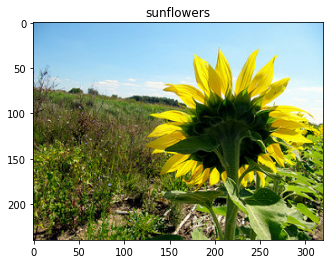

In [ ]:
get_label_name = metadata.features['label'].int2str

from itertools import islice
image, label = next(islice(iter(train_ds), 2, None))
plt.figure()
plt.imshow(image)
plt.title(get_label_name(label))
plt.show()

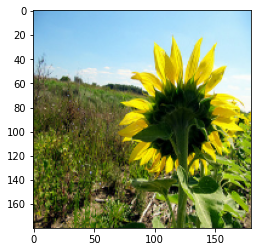

Min and max pixel values: 0.0 1.0


In [ ]:
result = resize_and_rescale(image)
plt.figure()
plt.imshow(result)
plt.show()

print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

### Data Augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(),
    tf.keras.layers.RandomRotation(0.2)
])

In [ ]:
result = tf.cast(tf.expand_dims(result, 0), tf.float32)

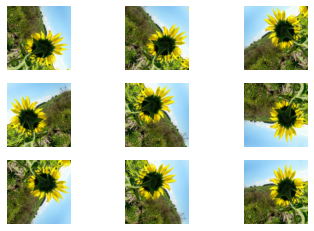

In [ ]:
plt.figure()
for i in range(9):
  augmented_img = data_augmentation(result)
  ax = plt.subplot(3, 3, i+1)
  plt.imshow(augmented_img[0])
  plt.axis('off')

plt.show()